In [160]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

# Radioactividad

In [161]:
def Minimos_cuadrados(x,y,n=1):
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

def GetError(x,y,p,n=1):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    R2 = None
    if np.shape(Cov) == (2,2):
        R2 = (Cov[0][1]**2)/(Cov[0][0]*Cov[1][1])

    return (Cov,R2,R)

def Get_sigma(Cov):
    sigmaai = np.sqrt(np.diagonal(Cov))
    return sigmaai[::-1]

def Error_relativo(X_real,X_exp):
    return (np.abs(X_exp - X_real)/X_real)

def presicion(d,v):
    p = (d/v)
    if p <= 0.1:
        return p,True
    else:
        return p,False
    
def exactitud(xr,xm,d):
    e = (np.abs(xr-xm))
    if e <= (2.5*d):
        return e/d,True
    else:
        return e/d,False
    
def Promedio(lista):
    return np.sum(lista) / len(lista)

def promedios(M):
    P = []
    for i in M:
        P.append(Promedio(i))
    return tuple(P)

def Standard_Deviation(lista):
    return np.sqrt(np.sum((lista-Promedio(lista))**2) / len(lista))

def SDs(M):
    S = []
    for i in M:
        S.append(Standard_Deviation(i))
    return tuple(S)

def conteo(lista):
    L = []
    L.append(lista[0])
    for i in range(len(lista)-1):
        L.append(lista[i+1]-lista[i])
    return np.array(L)

def conteo3(lista):
    n = len(lista)
    L = []
    L.append(lista[2])
    for i in range(2,int(((n-(n%3))/3)+1)):
        L.append(lista[(3*i)-1]-lista[(3*(i-1))-1])
    return np.array(L)

X = sym.Symbol('x',real=True)
Y = sym.Symbol('y',real=True)

# Datos

In [162]:
R_amb = 226/10
Dos = np.array([330., 670., 996., 1294., 1624., 1951., 2271., 2569., 2852., 3173.])
Cuatro = np.array([120., 248., 388., 511., 619., 733., 851., 977., 1086., 1183.])
Ocho = np.array([36., 68., 126., 174., 196., 225., 279., 331., 380., 419.])
B1 = np.array([186., 364., 537., 707., 893.])
B2 = np.array([28., 65., 104., 128., 165.])
B3 = np.array([32., 68., 99., 138., 173.])
t1 = np.array([1., 2., 3., 4., 5., 6., 7., 8., 9., 10.])
t2 = np.array([1., 2., 3., 4., 5.])

# Análisis

1 min

In [163]:
Dos_c = conteo(Dos) - R_amb
Cuatro_c = conteo(Cuatro) - R_amb
Ocho_c = conteo(Ocho) - R_amb
B1_c = conteo(B1) - R_amb
B2_c = conteo(B2) - R_amb
B3_c = conteo(B3) - R_amb
M_1 = np.array([Dos_c,Cuatro_c,Ocho_c])
(Promedio(Dos_c),Promedio(Cuatro_c),Promedio(Ocho_c))

(294.7, 95.7, 19.3)

In [164]:
SD2,SD4,SD8 = SDs(M_1)
(SD2,SD4,SD8)

(17.175855146105533, 11.463420083029323, 11.396929411029975)

In [165]:
Err2,Err4,Err8 = SDs(M_1)/np.sqrt(10)
(Err2,Err4,Err8)

(5.431482302281762, 3.6250517237689173, 3.604025527101605)

In [166]:
frec_Dos_c = Dos_c / 60
frec_Cuatro_c = Cuatro_c / 60
frec_Ocho_c = Ocho_c / 60
frec_B1_c = B1_c / 60
frec_B2_c = B2_c / 60
frec_B3_c = B3_c / 60
M_1 = np.array([frec_Dos_c,frec_Cuatro_c,frec_Ocho_c])
M_1

array([[ 5.12333333,  5.29      ,  5.05666667,  4.59      ,  5.12333333,
         5.07333333,  4.95666667,  4.59      ,  4.34      ,  4.97333333],
       [ 1.62333333,  1.75666667,  1.95666667,  1.67333333,  1.42333333,
         1.52333333,  1.59      ,  1.72333333,  1.44      ,  1.24      ],
       [ 0.22333333,  0.15666667,  0.59      ,  0.42333333, -0.01      ,
         0.10666667,  0.52333333,  0.49      ,  0.44      ,  0.27333333]])

In [167]:
P2,P4,P8 = promedios(M_1)
(P2,P4,P8)

(4.911666666666666, 1.595, 0.32166666666666666)

In [168]:
SD2_f,SD4_f,SD8_f = SDs(M_1)
(SD2_f,SD4_f,SD8_f)

(0.28626425243509224, 0.19105700138382206, 0.1899488235171662)

In [169]:
Err2_f,Err4_f,Err8_f = SDs(M_1)/np.sqrt(10)
(Err2_f,Err4_f,Err8_f)

(0.09052470503802937, 0.06041752872948196, 0.06006709211836007)

In [170]:
#residuos
r_2 = Dos_c - Promedio(Dos_c)
r_4 = Cuatro_c - Promedio(Cuatro_c)
r_8 = Ocho_c - Promedio(Ocho_c)

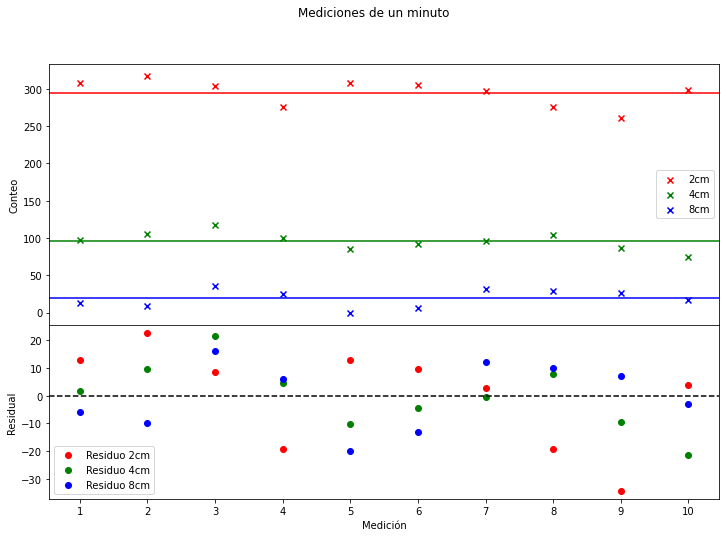

In [171]:
fig,axs = plt.subplots(2,1,figsize=(12,8),gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle('Mediciones de un minuto')

axs[0].scatter(t1,Dos_c,label='2cm',color='red',marker='x')
axs[0].axhline(y=Promedio(Dos_c),color='red')
axs[0].scatter(t1,Cuatro_c,label='4cm',color='green',marker='x')
axs[0].axhline(y=Promedio(Cuatro_c),color='green')
axs[0].scatter(t1,Ocho_c,label='8cm',color='blue',marker='x')
axs[0].axhline(y=Promedio(Ocho_c),color='blue')
axs[0].set_ylabel('Conteo')
axs[0].legend()

axs[1].scatter(t1,r_2,label='Residuo 2cm',color='red')
axs[1].scatter(t1,r_4,label='Residuo 4cm',color='green')
axs[1].scatter(t1,r_8,label='Residuo 8cm',color='blue')
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_ylabel('Residual')
axs[1].set_xlabel('Medición')
axs[1].set_xticks(np.arange(1., 11., 1.))
axs[1].legend()
plt.show()

3 min

In [172]:
Dos_c3 = conteo3(Dos) - (3*R_amb)
Cuatro_c3 = conteo3(Cuatro) - (3*R_amb)
Ocho_c3 = conteo3(Ocho) - (3*R_amb)
M_3 = np.array([Dos_c3,Cuatro_c3,Ocho_c3])
(Promedio(Dos_c3),Promedio(Cuatro_c3),Promedio(Ocho_c3))

(882.8666666666668, 294.2, 58.86666666666665)

In [173]:
SD2_3,SD4_3,SD8_3 = SDs(M_3)
(SD2_3,SD4_3,SD8_3)

(38.90444133457716, 18.672618098881223, 22.866763848189994)

In [174]:
Err2_c3,Err4_c3,Err8_c3 = SDs(M_3)/np.sqrt(3)
(Err2_c3,Err4_c3,Err8_c3)

(22.461489677190126, 10.780641085864152, 13.202132263248096)

In [175]:
frec_Dos_c3 = (Dos_c3/3) / 60
frec_Cuatro_c3 = (Cuatro_c3/3) / 60
frec_Ocho_c3 = (Ocho_c3/3) / 60
M_3 = np.array([frec_Dos_c3,frec_Cuatro_c3,frec_Ocho_c3])
M_3

array([[5.15666667, 4.92888889, 4.62888889],
       [1.77888889, 1.54      , 1.58444444],
       [0.32333333, 0.17333333, 0.48444444]])

In [176]:
P2_3,P4_3,P8_3 = promedios(M_3)
(P2_3,P4_3,P8_3)

(4.904814814814816, 1.6344444444444444, 0.32703703703703696)

In [177]:
SD2_3_f,SD4_3_f,SD8_3_f = SDs(M_3)
(SD2_3_f,SD4_3_f,SD8_3_f)

(0.21613578519209528, 0.10373676721600691, 0.12703757693438886)

In [178]:
Err2_c3_f,Err4_c3_f,Err8_c3_f = SDs(M_3)/np.sqrt(3)
(Err2_c3_f,Err4_c3_f,Err8_c3_f)

(0.12478605376216735, 0.05989245047702314, 0.0733451792402672)

In [179]:
t1 = np.array([1., 2., 3.])
#residuos
r_2 = Dos_c3 - Promedio(Dos_c3)
r_4 = Cuatro_c3 - Promedio(Cuatro_c3)
r_8 = Ocho_c3 - Promedio(Ocho_c3)

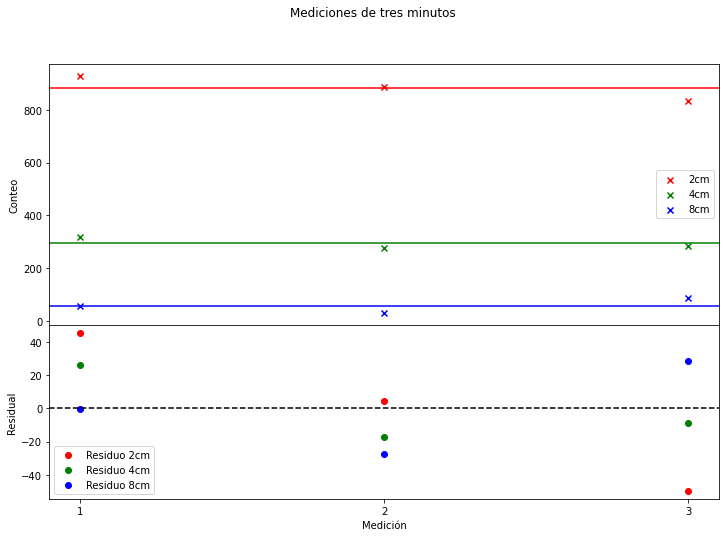

In [180]:
fig,axs = plt.subplots(2,1,figsize=(12,8),gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle('Mediciones de tres minutos')

axs[0].scatter(t1,Dos_c3,label='2cm',color='red',marker='x')
axs[0].axhline(y=Promedio(Dos_c3),color='red')
axs[0].scatter(t1,Cuatro_c3,label='4cm',color='green',marker='x')
axs[0].axhline(y=Promedio(Cuatro_c3),color='green')
axs[0].scatter(t1,Ocho_c3,label='8cm',color='blue',marker='x')
axs[0].axhline(y=Promedio(Ocho_c3),color='blue')
axs[0].set_ylabel('Conteo')
axs[0].legend()

axs[1].scatter(t1,r_2,label='Residuo 2cm',color='red')
axs[1].scatter(t1,r_4,label='Residuo 4cm',color='green')
axs[1].scatter(t1,r_8,label='Residuo 8cm',color='blue')
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_ylabel('Residual')
axs[1].set_xlabel('Medición')
axs[1].set_xticks(np.arange(1., 4., 1.))
axs[1].legend()
plt.show()

10 min

In [181]:
Dos_c10 = Dos[-1] - (10*R_amb)
Cuatro_c10 = Cuatro[-1] - (10*R_amb)
Ocho_c10 = Ocho[-1] - (10*R_amb)
(Dos_c10,Cuatro_c10,Ocho_c10)

(2947.0, 957.0, 193.0)

In [182]:
frec_Dos_c10 = (Dos_c10/10)/60
frec_Cuatro_c10 = (Cuatro_c10/10)/60
frec_Ocho_c10 = (Ocho_c10/10)/60
(frec_Dos_c10,frec_Cuatro_c10,frec_Ocho_c10)

(4.911666666666666, 1.595, 0.32166666666666666)

Barreras

In [183]:
# B1 = papel
# B2 = aluminio
# B3 = plomo
M_B = np.array([B1_c,B2_c,B3_c])
(B1_c,B2_c,B3_c)

(array([163.4, 155.4, 150.4, 147.4, 163.4]),
 array([ 5.4, 14.4, 16.4,  1.4, 14.4]),
 array([ 9.4, 13.4,  8.4, 16.4, 12.4]))

In [184]:
(Promedio(B1_c),Promedio(B2_c),Promedio(B3_c))

(156.0, 10.399999999999999, 11.999999999999998)

In [185]:
ErrB1,ErrB2,ErrB3 = SDs(M_B)/np.sqrt(5)
(ErrB1,ErrB2,ErrB3)

(2.93393933134276, 2.638181191654583, 1.2837445228704971)

In [186]:
S_B1,S_B2,S_B3 = SDs(M_B)
(S_B1,S_B2,S_B3)

(6.560487786742691, 5.89915248150105, 2.870540018881465)

In [187]:
M_B = np.array([frec_B1_c,frec_B2_c,frec_B3_c])
P_B1,P_B2,P_B3 = promedios(M_B)
(P_B1,P_B2,P_B3)

(2.6, 0.1733333333333333, 0.19999999999999998)

In [188]:
S_B1_f,S_B2_f,S_B3_f = SDs(M_B)
(S_B1_f,S_B2_f,S_B3_f)

(0.10934146311237829, 0.09831920802501751, 0.04784233364802441)

In [189]:
ErrB1_f,ErrB2_f,ErrB3_f = SDs(M_B)/np.sqrt(5)
(ErrB1_f,ErrB2_f,ErrB3_f)

(0.04889898885571271, 0.04396968652757639, 0.021395742047841615)

In [190]:
t1 = np.array([1., 2., 3., 4., 5.])
#residuos
r_B1 = B1_c - Promedio(B1_c)
r_B2 = B2_c - Promedio(B2_c)
r_B3 = B3_c - Promedio(B3_c)

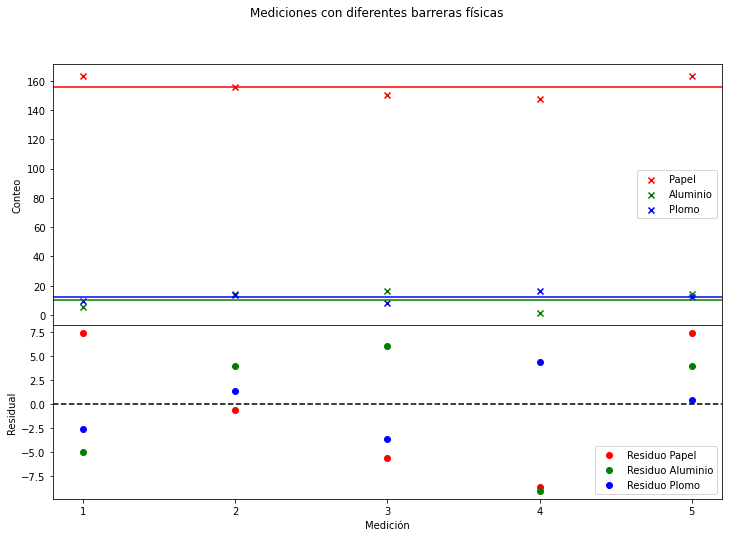

In [191]:
fig,axs = plt.subplots(2,1,figsize=(12,8),gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle('Mediciones con diferentes barreras físicas')

axs[0].scatter(t1,B1_c,label='Papel',color='red',marker='x')
axs[0].axhline(y=Promedio(B1_c),color='red')
axs[0].scatter(t1,B2_c,label='Aluminio',color='green',marker='x')
axs[0].axhline(y=Promedio(B2_c),color='green')
axs[0].scatter(t1,B3_c,label='Plomo',color='blue',marker='x')
axs[0].axhline(y=Promedio(B3_c),color='blue')
axs[0].set_ylabel('Conteo')
axs[0].legend()

axs[1].scatter(t1,r_B1,label='Residuo Papel',color='red')
axs[1].scatter(t1,r_B2,label='Residuo Aluminio',color='green')
axs[1].scatter(t1,r_B3,label='Residuo Plomo',color='blue')
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_ylabel('Residual')
axs[1].set_xlabel('Medición')
axs[1].set_xticks(np.arange(1., 6., 1.))
axs[1].legend()
plt.show()